# Présentation du problème

On cherche à déterminer le chemin le plus rapide entre un sauveteur sur la plage et un nageur en perdition dans la mer.

La modélisation est représentée par le dessin suivant, la seule variable endogène étant $x$.

<center>
<img src="./dessin.png" width="600">
</center>



# Initialisations

In [3]:
import sympy as sp

In [4]:
# Pour éviter des affichages impestifs dûe à un appel obsolète de sympy vers matplotlib
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
sp.init_printing()

# Définition des objets fondamentaux


In [6]:
xs, ys, xn, yn, vs, ve, x = sp.symbols("x_s y_s x_n y_n v_s v_e x")

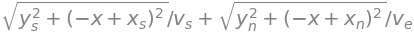

In [8]:
T = sp.sqrt((xs - x) ** 2 + ys ** 2) / vs +  sp.sqrt((xn - x) ** 2 + yn ** 2) / ve
T

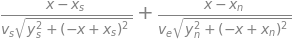

In [9]:
derive = T.diff(x)
derive

In [10]:
#sp.solve(sp.Eq(derive, 0), x)

**REMARQUE** la résolution naïve tourne indéfiniment et a donc été commentée.

# Manipulations de l'expression pour guider le calcul

## Visualisation de l'expression elle même

Le graphique est généré en utilisant [graphviz](https://graphviz.org/) (commande `dot`).

In [18]:
sp.srepr(derive)

"Add(Mul(Pow(Symbol('v_s'), Integer(-1)), Add(Symbol('x'), Mul(Integer(-1), Symbol('x_s'))), Pow(Add(Pow(Symbol('y_s'), Integer(2)), Pow(Add(Mul(Integer(-1), Symbol('x')), Symbol('x_s')), Integer(2))), Rational(-1, 2))), Mul(Pow(Symbol('v_e'), Integer(-1)), Add(Symbol('x'), Mul(Integer(-1), Symbol('x_n'))), Pow(Add(Pow(Symbol('y_n'), Integer(2)), Pow(Add(Mul(Integer(-1), Symbol('x')), Symbol('x_n')), Integer(2))), Rational(-1, 2))))"

In [20]:
with open("arbre.dot", "w") as fichier:
    fichier.write(sp.printing.dot.dotprint(derive))

In [21]:
%%sh
dot -Tsvg arbre.dot > arbre.svg

<img src="arbre.svg">

## Manipulations

- On va récupérer les premiers termes de l'arbre grâce aux attributs `func` et `args`.
- On pourrait itérer sur les sommets en utilisant les fonctions `preorder_traversal` ou `postorder_traversal`.


In [17]:
derive.func

sympy.core.add.Add

In [11]:
gauche, droite = derive.args

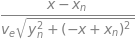

In [12]:
gauche

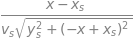

In [22]:
droite

**Attention** contrairement à ce qu'on pourrait croire les termes `gauche` et `droite` sont des produits. 
Pour les traiter comme des fractions et récupérer numérateurs et dénominateurs il faut une méthode spécifique.

In [13]:
num_g, den_g = gauche.as_numer_denom()
num_d, den_d = droite.as_numer_denom()


In [14]:
p = num_g ** 2 * den_d ** 2 -  num_d ** 2 * den_g ** 2
p

In [15]:
p = p.as_poly(x)
p

**REMARQUE** à ce stade on s'est ramené à trouver des racines d'un polynôme de degré 4 en $x$.
On notera par contre que les coefficients sont considérés êtres des polynômes à coefficients entiers en les variables exogènes.

In [23]:
p.get_domain()

ZZ[v_e,v_s,x_n,x_s,y_n,y_s]

In [25]:
p = p.to_field()
p

In [28]:
sols = sp.solve(p, x)

In [29]:
type(sols)

list

In [30]:
sols[0]

⎧                                                                                                                                                
⎪                                                                                                                                                
⎪                                                                                                                                                
⎪                                                                                                                                                
⎪                                                                                                                                                
⎪                                                                                                                                                
⎪                                                                                                                           

**Conclusion**
On se convaincra facilement que même si on a effectivement trouvé des formules exactes celles-ci sont inexploitables.
On passera donc à des méthodes numériques.